In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [136]:
def pretty_plot(t1: np.array, x1: np.array,
                v1: np.array, a1: np.array,
                ue1: np.array, utotal1: np.array, 
                
                t2: np.array, x2: np.array,
                v2: np.array, a2: np.array,
                ue2: np.array, utotal2: np.array,
                
                t3: np.array, x3: np.array,
                v3: np.array, a3: np.array,
                ue3: np.array, utotal3: np.array):
    
    
    fig, axs = plt.subplots(3, 2, figsize=(15,15))
    fig.tight_layout()
    fig.tight_layout(pad=3.0)

    axs[0,0].set_title("Posición en función del tiempo")
    axs[0,0].set_xlabel("Tiempo (segundos)")
    axs[0,0].set_ylabel("Posición en x (mt)")
    axs[0,0].plot(t1, x1)
    axs[0,0].plot(t2, x2)
    axs[0,0].plot(t3, x3)
    axs[0,0].legend(["Euler", "E. Cramer", "Ideal"])
    

    axs[0,1].set_title("Velocidad en función del tiempo")
    axs[0,1].set_xlabel("Tiempo (segundos)")
    axs[0,1].set_ylabel("Velocidad (mt/s)")
    axs[0,1].plot(t1, v1)
    axs[0,1].plot(t2, v2)
    axs[0,1].plot(t3, v3)
    
    axs[0,1].legend(["Euler", "E. Cramer", "Ideal"])

    axs[1,0].set_title("Aceleración en función del tiempo")
    axs[1,0].set_xlabel("Tiempo (segundos)")
    axs[1,0].set_ylabel("Aceleración en x (mt/s^{2})")
    axs[1,0].plot(t1, a3)
    axs[1,0].plot(t2, a2)
    axs[1,0].plot(t3, a1)
    
    axs[1,0].legend(["Euler", "E. Cramer", "Ideal"])

    
    axs[1,1].set_title("Energía elástica en función del tiempo")
    axs[1,1].set_xlabel("Tiempo (segundos)")
    axs[1,1].set_ylabel("Jules")
    axs[1,1].plot(t1, ue1)
    axs[1,1].plot(t2, ue2)
    axs[1,1].plot(t3, ue3)

    
    axs[1,1].legend(["Euler", "E. Cramer", "Ideal"])

    
    axs[2,0].set_title("Energía total en función del tiempo")
    axs[2,0].set_xlabel("Tiempo (segundos)")
    axs[2,0].set_ylabel("Jules")
    axs[2,0].plot(t1, utotal1)
    axs[2,0].plot(t2, utotal2)
    axs[2,0].plot(t3, utotal3)


    
    axs[2,0].legend(["Euler", "E. Cramer", "Ideal"])

    
    plt.show()
    

In [105]:
def euler_masa_resorte(mass: float, k: float, x0: float,
                      v0: float, ti: float,
                      tf: float, delta: float):
    
    """
    m: masa 
    k: constante de elasticidad
    x0:  posición inicial en x
    v0: velocidad inicial en x
    ti: tiempo inicial
    tf: tiempo final
    delta: distancia entre punto y punto de la serie de tiempo 
            (tiene que ser menor igual a 1)
    """
    
    time = np.arange(ti, tf, delta)
    npoints = time.shape[0]
        
    #posición en x
    x = np.zeros((1, npoints))
    x[0, 0] = x0
    
    
    #velocidad en x
    vx = np.zeros((1, npoints))
    vx[0, 0] = v0
    
    
    #velocidad en x
    a = np.zeros((1, npoints))
    a[0, 0] = (-k/mass)*x0
    
    #energía potencial elástica
    ue = np.zeros((1, npoints))
    
    #energía total del sistema 
    utotal = np.zeros((1, npoints)) 

    #print(time.shape)
    #print(x.shape)
    #print(vx.shape)
    #print((tf-ti)*npoints)

    
    for sec in range( npoints - 1):
        
        x[0, sec + 1] = x[0, sec] + (vx[0, sec]*delta)
        
        # velocidad[t + 1] = velocidad[t] + (delta * aceleracion[t])
        vx[0, sec +1] = vx[0, sec] + delta*a[0, sec]
        
        #recalculo la aceleración 
        # aceleracion[t+1] = (-k/m)*x[t+1]
        
        a[0, sec + 1] = (-k/mass)*x[0, sec + 1]
        
        ue[0, sec] = (1/2)* k * (x[0, sec]**2)
        utotal[0, sec] = (k/2)* (x[0, sec]**2) + (mass/2)*(vx[0, sec] ** 2)

    #calcula el último punto para los vectores de energías
    ue[0, npoints-1] = (1/2)* k * (x[0, npoints-1]**2)
    utotal[0, npoints-1] = (k/2)* (x[0, npoints-1]**2) + (mass/2)*(vx[0, npoints-1] ** 2)
        
    return time, x[0,:], vx[0,:], a[0,:], ue[0,:], utotal[0,:]
    

In [128]:
def euler_cromer_masa_resorte(mass: float, k: float, x0: float,
                      v0: float, ti: float,
                      tf: float, delta: float):
    
    """
    m: masa 
    k: constante de elasticidad
    x0:  posición inicial en x
    v0: velocidad inicial en x
    ti: tiempo inicial
    tf: tiempo final
    delta: distancia entre punto y punto de la serie de tiempo 
            (tiene que ser menor igual a 1)
    """
    
    time = np.arange(ti, tf, delta)
    npoints = time.shape[0]
        
    #posición en x
    x = np.zeros((1, npoints))
    x[0, 0] = x0
    
    
    #velocidad en x
    vx = np.zeros((1, npoints))
    vx[0, 0] = v0
    
    #velocidad aceleración en x
    a = np.zeros((1, npoints))
    a[0, 0] = (-k/mass)*x0
    
    #energía potencial elástica
    ue = np.zeros((1, npoints))
    
    #energía total del sistema 
    utotal = np.zeros((1, npoints)) 
    
    
    #print(time.shape)
    #print(x.shape)
    #print(vx.shape)
    #print((tf-ti)*npoints)

    
    for sec in range( npoints - 1):
        
        # velocidad[t + 1] = velocidad[t] + (delta * aceleracion[t])
        a[0, sec] = (-k * x[0, sec])/mass
        vx[0, sec +1] = vx[0, sec] + (delta * a[0, sec])
        
        x[0, sec + 1] = x[0, sec] + (vx[0, sec + 1]*delta)
        
        
        ue[0, sec] = (1/2)* k * (x[0, sec]**2)
        utotal[0, sec] = (k/2)* (x[0, sec]**2) + (mass/2)*(vx[0, sec] ** 2)

    #calcula el último punto para los vectores de energías
    a[0, npoints-1] = (-k * x[0, npoints-1])/mass
    
    #calcula el último punto para los vectores de energías
    ue[0, npoints-1] = (1/2)* k * (x[0, npoints-1]**2)
    utotal[0, npoints-1] = (k/2)* (x[0, npoints-1]**2) + (mass/2)*(vx[0, npoints-1] ** 2)
        
    return time, x[0,:], vx[0,:], a[0,:], ue[0,:], utotal[0,:]

    

In [184]:
def ideal_masa_resorte(mass: float, k: float, x0: float,
                          v0: float, ti: float,
                          tf: float, delta: float):
    
    
    time = np.arange(ti, tf, delta)
    w = np.sqrt(k/mass)
    npoints = time.shape[0]
        
    # posición en x
    x = x0 * np.cos(w*time) 
    
    # velocidad en x
    vx = -x0 * w * np.sin(w*time) #+ v0
    
    # aceleración en x
    a = -x0 * (w**2) * np.cos(w*time)
    
    #calcula el último punto para los vectores de energías
    ue = (1/2)* k * (x**2)
    utotal = (k/2) * (x**2) + (mass/2)* (vx**2)
        
    return time, x, vx, a, ue, utotal


In [185]:
mass = 10
k = 5
x0 = 3
v0 = 0
ti = 0
tf = 15
delta = 0.01

t1, x1 , v1, a1, ue1, utotal1 = euler_masa_resorte(mass = mass, k = k,
                                                   x0 = x0, v0 = v0,
                                                   ti = ti, tf = tf, delta = delta)

t2, x2 , v2, a2, ue2, utotal2 = euler_cromer_masa_resorte(mass = mass, k = k,
                                                          x0 = x0, v0 = v0,
                                                          ti = ti, tf = tf, delta = delta)

t3, x3 , v3, a3, ue3, utotal3 = ideal_masa_resorte(mass = mass, k = k,
                                                   x0 = x0, v0 = v0,
                                                   ti = ti, tf = tf, delta = delta)

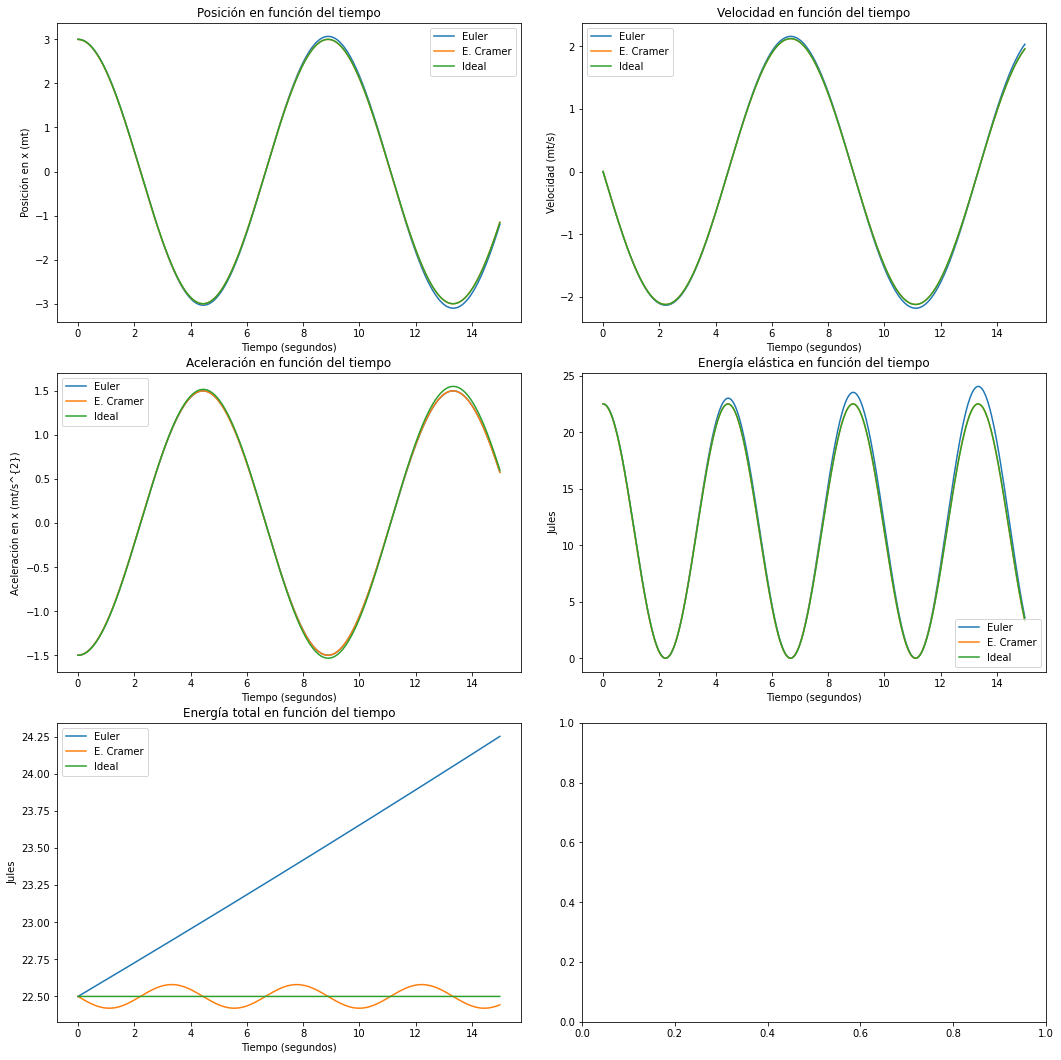

In [186]:
pretty_plot(t1, x1 , v1, a1, ue1, utotal1,
            t2, x2 , v2, a2, ue2, utotal2,
            t3, x3 , v3, a3, ue3, utotal3)